# Switchbacks identification

<div class="alert alert-block alert-info">
<b>References:</b> <br/>
- Plazanet, Corinne Margote, 2001. Modeling Geometry for Linear Feature Generalization. 
</div>

Un point d'inflexion est un point où la courbe change de convexité.

Un virage est délimité par deux points d'inflexion. Le virage est constitué des points de la trace entre ses deux points limites. 

Les lacets sont des séries de virage, fusion des virages successifs. Ils sont paramétrés suivant un nombre minimal de virage et une distance maximale entre les sommets de deux virages consécutifs.

## Import de la librairie tracklib

In [1]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import os.path
import sys

#-------------------------------------------------------
# Import de tracklib
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import tracklib as trk

## Chargement de la trace + interpolation spatiale

<AxesSubplot: title={'center': 'Track 903959'}, xlabel='E (m)', ylabel='N (m)'>

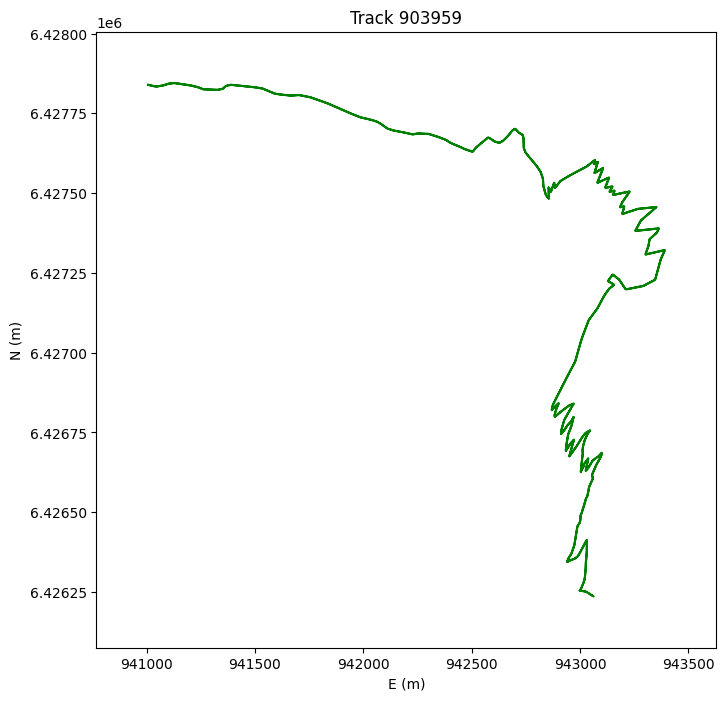

In [2]:
csvpath = '../../../data/lacet/ecrins.csv'
tracks = trk.TrackReader.readFromWkt(csvpath, 0, 1, 2, ",", 1, "ENUCoords", None, True)

trace = tracks["903959","%"][0]
trace.resample(5, trk.MODE_SPATIAL)

#traceE = trace.extract(405, 1217)
#traceE = trace.extract(405, 850)
traceE = trace.copy()

plt.figure(figsize = (8,8))
traceE.plot(append = True, sym='g-', label='original extract track 3')


## Lissage gaussien de la trace

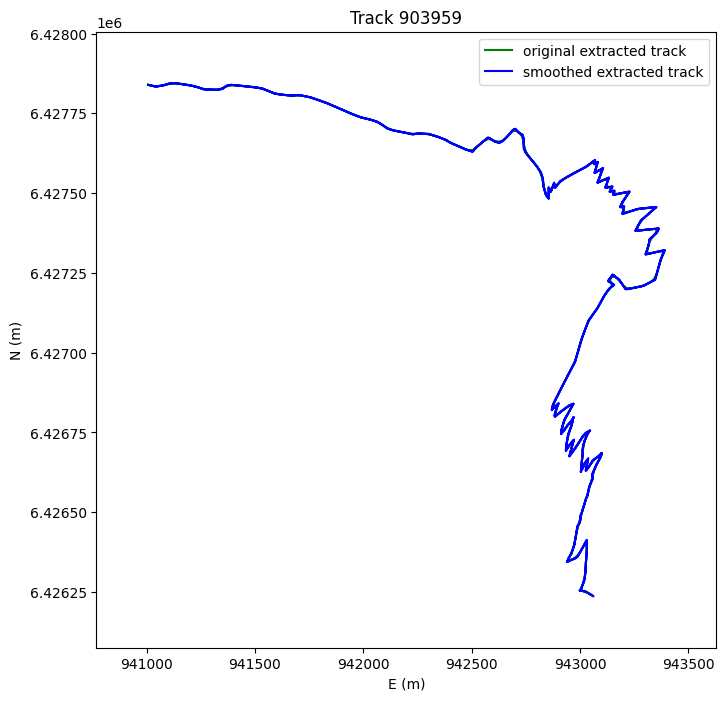

In [3]:
kernel = trk.GaussianKernel(3)

# On fait une copie pour jouer
traceEBis = traceE.copy()

# Calcul
traceEBis.operate(trk.Operator.FILTER, "x", kernel, "x_filtered")
traceEBis.operate(trk.Operator.FILTER, "y", kernel, "y_filtered")
traceEBis.operate("x=x_filtered")
traceEBis.operate("y=y_filtered")

# Dessin
plt.figure(figsize = (8,8))
traceEBis.plot(append = True, sym='g-', label='original extracted track')
traceE.plot(append = True, sym='b-', label='smoothed extracted track')
plt.legend()


## Compute inflection points

<AxesSubplot: title={'center': 'Track 903959'}, xlabel='E (m)', ylabel='N (m)'>

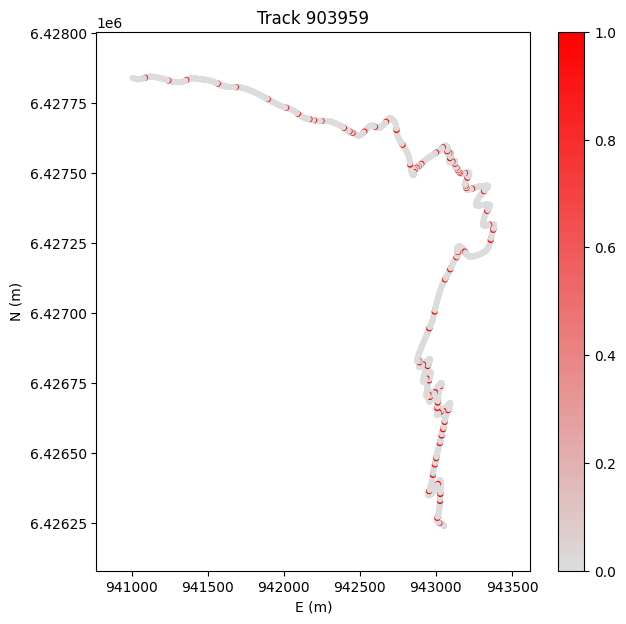

In [4]:
# On repart du lissage
traceE = traceEBis

# Calcul
trk.inflection(traceE)

# Dessin
COLS = trk.getColorMap((220, 220, 220), (255, 0, 0))
plt.figure(figsize = (7, 7))
traceE.plot(type='POINT', af_name='inflection', append = True, 
            cmap = COLS, pointsize=10)

## Détection des sommets

<AxesSubplot: title={'center': 'Track 903959'}, xlabel='E (m)', ylabel='N (m)'>

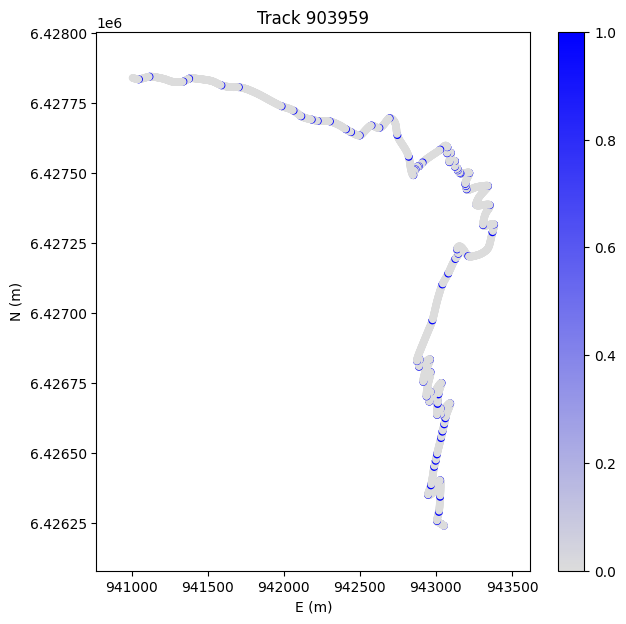

In [5]:
# On repart du lissage
traceE = traceEBis

# Calcul
trk.setVertexAF(traceE)

# Dessin
COLS = trk.getColorMap((220, 220, 220), (0, 0, 255))
plt.figure(figsize = (7,7))
traceE.plot(type='POINT', af_name='vertex', append = True, cmap = COLS, pointsize=20)

## Construction des virages


<AxesSubplot: title={'center': 'Track 903959'}, xlabel='E (m)', ylabel='N (m)'>

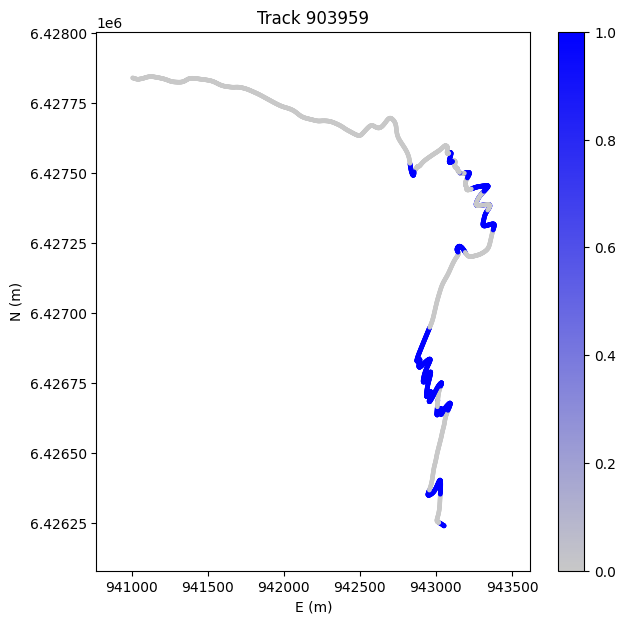

In [6]:
# On repart du lissage
traceE = traceEBis

# Calcul
from numpy import pi
BE = trk.setBendAsAF(traceE, 75*pi/180)

# Dessin
COLS = trk.getColorMap((200, 200, 200), (0, 0, 255))
plt.figure(figsize = (7, 7))
traceE.plot(type='POINT', af_name='bend', append = True, cmap = COLS)

## Construction des lacets

Il faut choisir 2 paramètres:
* distance maximum entre deux sommets pour qu'ils appartiennent a une même suite
* nombre de virages minimum pour constituer une série de virages


<AxesSubplot: title={'center': 'Track 903959'}, xlabel='E (m)', ylabel='N (m)'>

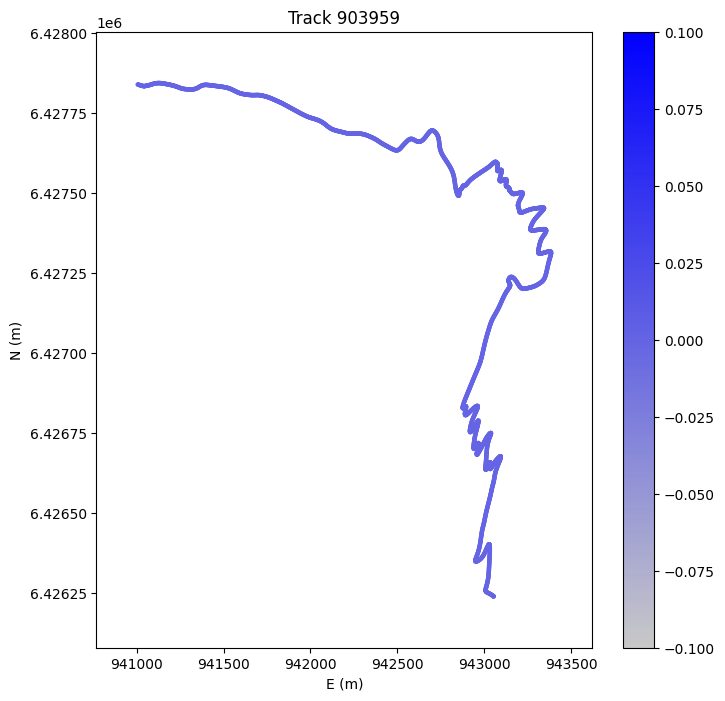

In [7]:
# Calcul
trk.setSwitchbacksAsAF(traceE, 20, 50)

# Dessin
COLS = trk.getColorMap((200, 200, 200), (0, 0, 255))
plt.figure(figsize = (8,8))
traceE.plot(type='POINT', af_name='switchbacks', append = True, cmap = COLS)